# Сверточная нейронная сеть

In [1]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\liya\anaconda3\lib\site-packages (2.3.1)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied, skipping upgrade: termcolor>=1.1.0 in c:\users\liya\anaconda3\lib\site-packages (from tensorflow) (1.1.0)
  Using cached numpy-1.18.5-cp38-cp38-win_amd64.whl (12.8 MB)
  Using cached h5py-2.10.0-cp38-cp38-win_amd64.whl (2.5 MB)


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Отказано в доступе: 'C:\\Users\\Liya\\anaconda3\\Lib\\site-packages\\numpy\\random\\_bit_generator.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4
  Rolling back uninstall of numpy
  Moving to c:\users\liya\anaconda3\lib\site-packages\numpy-1.19.4.dist-info\
   from C:\Users\Liya\anaconda3\Lib\site-packages\~umpy-1.19.4.dist-info
  Moving to c:\users\liya\anaconda3\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
   from C:\Users\Liya\AppData\Local\Temp\pip-uninstall-uloqrv_7\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
  Moving to c:\users\liya\anaconda3\lib\site-packages\numpy\__config__.py
   from C:\Users\Liya\AppData\Local\Temp\pip-uninstall-2bdgig3c\__config__.py
  Moving to c:\users\liya\anaconda3\lib\site-packages\numpy\__init__.cython-30.pxd
   from C:\Users\Liya\AppData\Local\Temp\pip-uninstall-2bdgig3c\__init__.cython-30.pxd
  Moving to c:\users\liya\anaconda3\lib\site-packages\numpy\__init__.pxd
  

In [2]:
pip install keras


   from C:\Users\Liya\AppData\Local\Temp\pip-uninstall-2bdgig3c\__init__.py
  Moving to c:\users\liya\anaconda3\lib\site-packages\numpy\__pycache__\
   from C:\Users\Liya\anaconda3\Lib\site-packages\numpy\~_pycache__
  Moving to c:\users\liya\anaconda3\lib\site-packages\numpy\_distributor_init.py
   from C:\Users\Liya\AppData\Local\Temp\pip-uninstall-2bdgig3c\_distributor_init.py
  Moving to c:\users\liya\anaconda3\lib\site-packages\numpy\_globals.py
   from C:\Users\Liya\AppData\Local\Temp\pip-uninstall-2bdgig3c\_globals.py
  Moving to c:\users\liya\anaconda3\lib\site-packages\numpy\_pytesttester.py
   from C:\Users\Liya\AppData\Local\Temp\pip-uninstall-2bdgig3c\_pytesttester.py
  Moving to c:\users\liya\anaconda3\lib\site-packages\numpy\compat\
   from C:\Users\Liya\anaconda3\Lib\site-packages\numpy\~ompat
  Moving to c:\users\liya\anaconda3\lib\site-packages\numpy\conftest.py
   from C:\Users\Liya\AppData\Local\Temp\pip-uninstall-2bdgig3c\conftest.py
  Moving to c:\users\liya\anaco

Свёрточными сети называются так из за операции свертки, которая является основой всей сети. В этих сетях нету привычных связей и весовых коэффициентов. Вместо этого используется ядро свертки размером от 3х3 до 7х7. Операция свертки выделяет какой то признак в картинке, например переход от светлого пикселя к темному. Признаки зависят от ядра. 

Следующая операция Пулинг . Это как бы сжатие картинки или слоя свёртки по максимум или среднему значению, при этом группа пикселей (обычно размера 2×2) уплотняется до одного пикселя. По факту мы увеличиваем область которую захватывает ядро свертки в два раза. Переходя от маленьких деталей изображения к более крупным. Так же пулингом мы объединяем карты признаков (полученные сверткой) в более абстрактные признаки, уже не пиксела , а черточки и т.д.

In [3]:
 # Подключаем датасет.
from keras.datasets import mnist

## Загружаем данные 

In [4]:
# x_train и x_test содержат двухмерный массив с изображение цифр
# x_test, y_test массив с проверочными данными сети.  
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Трансформируем из двухмерного массива в трех мерный(28х28х1 канал)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

11493376/11490434 [==============================] - 16s 1us/step


In [5]:
#keras.utils.to_categorical(y, num_classes=None, dtype=’float32′)
#Преобразует вектор класса (целые числа) в двоичную матрицу классов.
from keras.utils import to_categorical

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Построение модели сети.

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf
# создание модели
model = Sequential()
# Добавляем слой
model.add(Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)))

Первый слой будет сверточный двухмерный (Conv2D) . Эти сверточные слои будут работать с входными изображениями, которые рассматриваются как двумерные матрицы. kernel_size=3 — размер ядра 3х3. Функция активации 'relu' ( Rectified Linear Activation ) , 64 это число ядер свертки( сколько признаком будем искать)

In [8]:
# Второй сверточный слой
model.add(Conv2D(32, kernel_size=3, activation=tf.nn.relu))
# Создаем вектор для полносвязной сети.
# Flatten() – слой, преобразующий 2D-данные в 1D-данные.
model.add(Flatten())

In [9]:
# Создадим однослойный перцептрон
# Dense() — полносвязный слов, число выходов — 10 , функция активации 'softmax'.
model.add(Dense(10, activation='softmax'))

Далее, нам нужно скомпилировать нашу модель. Компиляция модели использует три параметра: оптимизатор, потери и метрики.

* *Функция потерь (Loss function)* — измеряет точность модели во время обучения. Мы хотим минимизировать эту функцию чтоб "направить" модель в верном направлении.
* *Оптимизатор (Optimizer)*  — показывает каким образом обновляется модель на основе входных данных и функции потерь.
* *Метрики (Metrics)* — используются для мониторинга тренировки и тестирования модели. Наш пример использует метрику *accuracy* равную доле правильно классифицированных изображений.

Оптимизатор весов `optimizer='adam'` (Адам: метод стохастической оптимизации). Функция потерь : `loss='categorical_crossentropy'` категориальная перекрестная энтропия (categorical crossentropy CCE). 

In [10]:
model.compile(optimizer= tf.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Теперь запускаем обучение сети :

epochs=1 число эпох , validation_data=(x_test, y_test) — проверочные данные

In [11]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1)
print(hist.history)

1875/1875 [==============================] - 130s 70ms/step - loss: 0.2579 - accuracy: 0.9483 - val_loss: 0.0758 - val_accuracy: 0.9764
{'loss': [0.25790849328041077], 'accuracy': [0.9483333230018616], 'val_loss': [0.07580682635307312], 'val_accuracy': [0.9764000177383423]}


## Визуализация.

In [21]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.00%


Построим графики обучения для наглядности. Метод fit() возвращает историю обучения.

In [12]:
import matplotlib.pyplot as plt

In [13]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)


Epoch 1/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0704 - accuracy: 0.9789 - val_loss: 0.0859 - val_accuracy: 0.9750
Epoch 2/5
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0489 - accuracy: 0.9844 - val_loss: 0.0809 - val_accuracy: 0.9786
Epoch 3/5
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0371 - accuracy: 0.9880 - val_loss: 0.0892 - val_accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.1002 - val_accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.1030 - val_accuracy: 0.9800


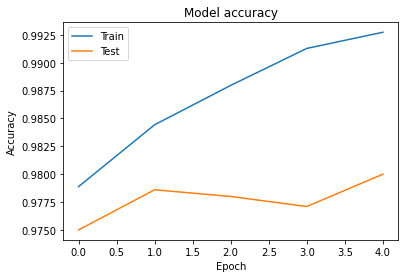

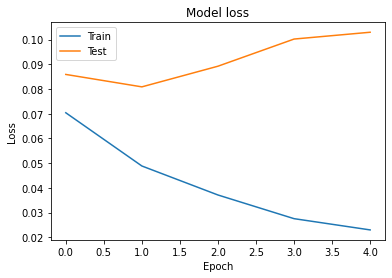

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
print(history.history)

{'loss': [0.07039621472358704, 0.04886070638895035, 0.037129830569028854, 0.027554161846637726, 0.023002419620752335], 'accuracy': [0.9788833260536194, 0.9844333529472351, 0.9879666566848755, 0.9912833571434021, 0.992733359336853], 'val_loss': [0.0859021544456482, 0.08087515085935593, 0.08923442661762238, 0.10021687299013138, 0.10297148674726486], 'val_accuracy': [0.9750000238418579, 0.978600025177002, 0.9779999852180481, 0.9771000146865845, 0.9800000190734863]}


Добавим слой Пулинг по Максимуму, и запустим на 10 эпох. Так же поменяем функцию ошибки и оптимизации.

In [16]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# создание модели
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)))
model2.add(MaxPooling2D())
model2.add(Conv2D(128, kernel_size=3, activation=tf.nn.relu))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer=tf.optimizers.SGD(), loss='mean_squared_error', metrics=['accuracy'])
history = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1085 - accuracy: 0.4391 - val_loss: 0.0606 - val_accuracy: 0.6640
Epoch 2/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0160 - accuracy: 0.9041 - val_loss: 0.0049 - val_accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0044 - accuracy: 0.9721 - val_loss: 0.0040 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0032 - accuracy: 0.9799 - val_loss: 0.0031 - val_accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0025 - accuracy: 0.9847 - val_loss: 0.0033 - val_accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0020 - accuracy: 0.9881 - val_loss: 0.0028 - val_accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0016 - accuracy: 0.9904 - val_loss: 0.0027 -

In [26]:
scores = model2.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.50%


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()